# Сбор базы статей на основе сервиса OpenAlex

## Задача 1
- Собрать ~10–100 научных статей из открытых источников (PubMed, bioRxiv) по темам:
  - Alzheimer's disease targets;
  - Alzheimer therapeutic targets;
  - Alzheimer drug targets.

*Предлагается провести несколько поисков по вышеперечисленным темам за последние 5 лет и отобрать по 30 наиболее релевантных цитируемых работ.*

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
search_string = "Alzheimer's disease targets"
from_publication_date = "2021-01-01"
to_publication_date = "2026-01-01"
page = 1
per_page = 20   # Между 1 и 200

In [ ]:
searching = f"https://api.openalex.org/works?page={page}&per-page={per_page}&filter=display_name.search:{search_string},type:article,is_oa:true,from_publication_date:{from_publication_date},to_publication_date:{to_publication_date}&sort=relevance_score:desc,cited_by_count:desc"

In [ ]:
response = requests.get(searching)
response.text

'{"meta":{"count":293,"db_response_time_ms":20,"page":1,"per_page":20,"groups_count":null},"results":[{"id":"https://openalex.org/W4206924079","doi":"https://doi.org/10.3389/fnagi.2021.809433","title":"Salidroside Ameliorates Alzheimer\'s Disease by Targeting NLRP3 Inflammasome-Mediated Pyroptosis","display_name":"Salidroside Ameliorates Alzheimer\'s Disease by Targeting NLRP3 Inflammasome-Mediated Pyroptosis","relevance_score":233.16838,"publication_year":2022,"publication_date":"2022-01-21","ids":{"openalex":"https://openalex.org/W4206924079","doi":"https://doi.org/10.3389/fnagi.2021.809433","pmid":"https://pubmed.ncbi.nlm.nih.gov/35126093"},"language":"en","primary_location":{"id":"doi:10.3389/fnagi.2021.809433","is_oa":true,"landing_page_url":"https://doi.org/10.3389/fnagi.2021.809433","pdf_url":null,"source":{"id":"https://openalex.org/S118428158","display_name":"Frontiers in Aging Neuroscience","issn_l":"1663-4365","issn":["1663-4365"],"is_oa":true,"is_in_doaj":true,"is_core":tru

In [ ]:
data = response.json()
data.keys()

dict_keys(['meta', 'results', 'group_by'])

In [ ]:
data['meta']

{'count': 293,
 'db_response_time_ms': 20,
 'page': 1,
 'per_page': 20,
 'groups_count': None}

In [ ]:
data['results'][0]

{'id': 'https://openalex.org/W4206924079',
 'doi': 'https://doi.org/10.3389/fnagi.2021.809433',
 'title': "Salidroside Ameliorates Alzheimer's Disease by Targeting NLRP3 Inflammasome-Mediated Pyroptosis",
 'display_name': "Salidroside Ameliorates Alzheimer's Disease by Targeting NLRP3 Inflammasome-Mediated Pyroptosis",
 'relevance_score': 233.16838,
 'publication_year': 2022,
 'publication_date': '2022-01-21',
 'ids': {'openalex': 'https://openalex.org/W4206924079',
  'doi': 'https://doi.org/10.3389/fnagi.2021.809433',
  'pmid': 'https://pubmed.ncbi.nlm.nih.gov/35126093'},
 'language': 'en',
 'primary_location': {'id': 'doi:10.3389/fnagi.2021.809433',
  'is_oa': True,
  'landing_page_url': 'https://doi.org/10.3389/fnagi.2021.809433',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S118428158',
   'display_name': 'Frontiers in Aging Neuroscience',
   'issn_l': '1663-4365',
   'issn': ['1663-4365'],
   'is_oa': True,
   'is_in_doaj': True,
   'is_core': True,
   'host_organiz

In [ ]:
def save_dois(search_string, from_publication_date, to_publication_date, quantity):

    page = 1
    per_page = min(quantity + 10, 200) # Берем чуть больше на случай, если в результатах окажутся одинаковые работы

    searching = f"https://api.openalex.org/works?page={page}&per-page={per_page}&filter=display_name.search:{search_string},type:article,is_oa:true,from_publication_date:{from_publication_date},to_publication_date:{to_publication_date}&sort=relevance_score:desc,cited_by_count:desc"
    response = requests.get(searching)
    data = response.json()

    quantity_found = data['meta']["count"]
    print(f"Количество найденных статей для запроса '{search_string}': {quantity_found}")

    if quantity_found < quantity:
        quantity = quantity_found

    articles_dict = {}
    i = 0
    while len(articles_dict) < quantity:
        if data['results'][i]["title"] not in list(articles_dict.keys()):
            articles_dict[data['results'][i]["title"]] = [data['results'][i]["title"], data['results'][i]["doi"], data['results'][i]["publication_year"]]
        i += 1

    return articles_dict

In [ ]:
search_strings = ["Alzheimer's disease targets", "Alzheimer therapeutic targets", "Alzheimer drug targets"]
from_publication_date = "2021-01-01"
to_publication_date = "2026-01-01"
quantity = 20

dicts = []
for search_string in search_strings:
    dicts.append(save_dois(search_string, from_publication_date, to_publication_date, quantity))

Количество найденных статей для запроса 'Alzheimer's disease targets': 293
Количество найденных статей для запроса 'Alzheimer therapeutic targets': 5
Количество найденных статей для запроса 'Alzheimer drug targets': 8


In [ ]:
articles_links = {}
for dict in dicts:
    articles_links.update(dict)

len(articles_links)

33

In [ ]:
list(articles_links.items())[0][1]

["Salidroside Ameliorates Alzheimer's Disease by Targeting NLRP3 Inflammasome-Mediated Pyroptosis",
 'https://doi.org/10.3389/fnagi.2021.809433',
 2022]

In [ ]:
titles = []
urls = []
years = []

items = list(articles_links.items())

for i in range (len(items)):
    titles.append(items[i][1][0])
    urls.append(items[i][1][1])
    years.append(items[i][1][2])

articles_links_df = pd.DataFrame({'title': titles, 'url': urls, 'year': years})
articles_links_df

,title,url,year
0,Salidroside Ameliorates Alzheimer's Disease by...,https://doi.org/10.3389/fnagi.2021.809433,2022
1,Metabolic reprogramming in inflammatory microg...,https://doi.org/10.1016/j.redox.2023.102846,2023
2,Natural acetylcholinesterase inhibitors: A mul...,https://doi.org/10.1016/j.ejmcr.2024.100154,2024
3,GSK3: A potential target and pending issues fo...,https://doi.org/10.1111/cns.14818,2024
4,Targeting dysregulated lipid metabolism for th...,https://doi.org/10.1016/j.nbd.2024.106505,2024
5,Targeting tau in Alzheimer's disease: from mec...,https://doi.org/10.4103/1673-5374.385847,2023
6,Intelligent lesion blood–brain barrier targeti...,https://doi.org/10.1016/j.apsb.2022.02.001,2022
7,Multi-target neuroprotective effects of herbal...,https://doi.org/10.1016/j.jep.2022.115107,2022
8,Associations of semaglutide with first‐time di...,https://doi.org/10.1002/alz.14313,2024
9,The VTA dopaminergic system as diagnostic and ...,https://doi.org/10.3389/fpsyt.2022.1039725,2022


In [ ]:
# В одной строке None, удалим
articles_links_df = articles_links_df.dropna(subset=['url'])

In [ ]:
response = requests.get(articles_links_df['url'][16])
response.headers.get("Content-Type", "").lower()

'text/html; charset=utf-8'

## Задача 2
- Извлечь и очистить текст (абстракты + введение + заключение)

*Вероятно, структура разных сайтов различается, из-за чего может усложниться парсинг.*

*Были попытки использовать selenium, а также trafilatura для извлечения текстов статей из гипертекстов, который по идее должен был позволить собрать быстро все статьи "без страданий", однако из-за переадресации у некоторых ссылок и дополнительной проверки с капчей возвращаются пустые строки, и скрапинг становится очень сложным или почти невозможным.*

*Попробуем скачать все статьи в пдф формате, а затем извлечь из файлов саммари с использованием локальной языковой модели. Локальная  позволяет быстрее обработать данные. Используется qwen2.5:7b-instruct. Среди официальных моделей (<8млрд параметров) на лидерборде Hugging Face она занимает второе место. По сравнению с моделью на первом месте контекстное окно текущей модели в 3 раза больше. Для извлечения конкретных разделов статьи лучше подойдут более крупные БЯМ, которые сложнее запускать локально.*

Одна статья недоступна, две на китайском (надо было изначально задать критерии включения), остается 29.

In [ ]:
import os
import re
from pypdf import PdfReader

In [ ]:
folder = "db"
files = []
for name in os.listdir(folder):
    if name.endswith(".pdf"):
        full_path = os.path.join(folder, name)
        files.append(full_path)


def get_number(file_path):
    numbers = re.findall(r'\d+', file_path)
    return int(numbers[-1]) if numbers else 0
files.sort(key=get_number)

print(files)

['db\\0.pdf', 'db\\1.pdf', 'db\\2.pdf', 'db\\3.pdf', 'db\\4.pdf', 'db\\5.pdf', 'db\\6.pdf', 'db\\7.pdf', 'db\\8.pdf', 'db\\9.pdf', 'db\\11.pdf', 'db\\12.pdf', 'db\\13.pdf', 'db\\14.pdf', 'db\\15.pdf', 'db\\16.pdf', 'db\\17.pdf', 'db\\18.pdf', 'db\\19.pdf', 'db\\20.pdf', 'db\\21.pdf', 'db\\22.pdf', 'db\\23.pdf', 'db\\25.pdf', 'db\\26.pdf', 'db\\28.pdf', 'db\\29.pdf', 'db\\31.pdf', 'db\\32.pdf']


In [ ]:
articles_df = articles_links_df.copy()

def extract_id(path):
    return int(re.findall(r'\d+', os.path.basename(path))[0])

file_mapping = {extract_id(f): f for f in files}

articles_df['filename'] = articles_df.index.map(file_mapping)
articles_df = articles_df.dropna(subset=['filename'])
articles_df

,title,url,year,filename
0,Salidroside Ameliorates Alzheimer's Disease by...,https://doi.org/10.3389/fnagi.2021.809433,2022,db\0.pdf
1,Metabolic reprogramming in inflammatory microg...,https://doi.org/10.1016/j.redox.2023.102846,2023,db\1.pdf
2,Natural acetylcholinesterase inhibitors: A mul...,https://doi.org/10.1016/j.ejmcr.2024.100154,2024,db\2.pdf
3,GSK3: A potential target and pending issues fo...,https://doi.org/10.1111/cns.14818,2024,db\3.pdf
4,Targeting dysregulated lipid metabolism for th...,https://doi.org/10.1016/j.nbd.2024.106505,2024,db\4.pdf
5,Targeting tau in Alzheimer's disease: from mec...,https://doi.org/10.4103/1673-5374.385847,2023,db\5.pdf
6,Intelligent lesion blood–brain barrier targeti...,https://doi.org/10.1016/j.apsb.2022.02.001,2022,db\6.pdf
7,Multi-target neuroprotective effects of herbal...,https://doi.org/10.1016/j.jep.2022.115107,2022,db\7.pdf
8,Associations of semaglutide with first‐time di...,https://doi.org/10.1002/alz.14313,2024,db\8.pdf
9,The VTA dopaminergic system as diagnostic and ...,https://doi.org/10.3389/fpsyt.2022.1039725,2022,db\9.pdf


In [ ]:
article_texts = []

for file in files:
    reader = PdfReader(file)
    article_text = ""

    for page in reader.pages:
        text = page.extract_text()
        if text:
            article_text += text + " "

    article_texts.append(article_text)

In [ ]:
articles_df['text'] = article_texts
articles_df

,title,url,year,filename,text
0,Salidroside Ameliorates Alzheimer's Disease by...,https://doi.org/10.3389/fnagi.2021.809433,2022,db\0.pdf,ORIGINAL RESEARCH\npublished: 21 January 2022\...
1,Metabolic reprogramming in inflammatory microg...,https://doi.org/10.1016/j.redox.2023.102846,2023,db\1.pdf,Redox Biology 66 (2023) 102846\nAvailable onli...
2,Natural acetylcholinesterase inhibitors: A mul...,https://doi.org/10.1016/j.ejmcr.2024.100154,2024,db\2.pdf,European Journal of Medicinal Chemistry Report...
3,GSK3: A potential target and pending issues fo...,https://doi.org/10.1111/cns.14818,2024,db\3.pdf,CNS Neurosci Ther. 2024;30:e14818.\t \t\t \t |...
4,Targeting dysregulated lipid metabolism for th...,https://doi.org/10.1016/j.nbd.2024.106505,2024,db\4.pdf,Neurobiology of Disease 196 (2024) 106505\nAva...
5,Targeting tau in Alzheimer's disease: from mec...,https://doi.org/10.4103/1673-5374.385847,2023,db\5.pdf,NEURAL REGENERATION RESEARCH｜Vol 19｜No. 7｜July...
6,Intelligent lesion blood–brain barrier targeti...,https://doi.org/10.1016/j.apsb.2022.02.001,2022,db\6.pdf,ORIGINAL ARTICLE\nIntelligent lesion blood ebr...
7,Multi-target neuroprotective effects of herbal...,https://doi.org/10.1016/j.jep.2022.115107,2022,db\7.pdf,Journal of Ethnopharmacology 290 (2022) 115107...
8,Associations of semaglutide with first‐time di...,https://doi.org/10.1002/alz.14313,2024,db\8.pdf,Received:29July2024 Revised:10September2024 Ac...
9,The VTA dopaminergic system as diagnostic and ...,https://doi.org/10.3389/fpsyt.2022.1039725,2022,db\9.pdf,TYPE Perspective\nPUBLISHED /one.tnum/seven.tn...


In [ ]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [ ]:
llm_articles_analyzer = ChatOllama(
    model="qwen2.5:7b-instruct",
    validate_model_on_init=True,
    temperature=0.5,
    num_predict=-1,
)

In [ ]:
print(llm_articles_analyzer.invoke("Who are you?").content)

I am Qwen, an AI assistant created by Alibaba Cloud. I'm here to help with a wide range of tasks and provide information on various topics. How can I assist you today?


In [ ]:
articles_df['text'][29]

"                                                                                 Galore International Journal of Health Sciences and Research \n                  Vol. 9; Issue: 1; Jan.-March 2024 \n                               Website: www.gijhsr.com                                                   \nResearch Article                                                                                                                                              P-ISSN: 2456-9321                                                                                          \n \n                       Galore International Journal of Health Sciences and Research (www.gijhsr.com)  138 \nVolume 9; Issue: 1; January-March 2024 \nGenomics and Drug Research Approach in \nIdentifying Potential Drug Target Highlighting \nAlzheimer Disease \n \nAnupriya1,2, Ayushi Poddar1,2, Sneha Priya1,3, Priyangulta Beck1,  \nHarsimran Kaur1,4, Seema Kumari1,6, Barkha Kachhap1,6, Nisha Rani Soreng1,2, \nSwati Shalika1

In [ ]:
prompt = ChatPromptTemplate.from_template("""
You are an AI assistant.
You receive a scientific article: {text}

Read the article and return the summary.

Output rules:
- Output MUST be relevant clean text only without any option words.
- Do NOT invent content that is not present in the provided text.
""")

article_analysing = prompt | llm_articles_analyzer | StrOutputParser()

In [ ]:
article_analysing.invoke({"text": articles_df['text'][0]})

"Salidroside, a natural compound derived from Rhodiola plants, has been shown to exert neuroprotective effects against cognitive decline associated with Alzheimer's disease (AD). Studies indicate its potential through multiple mechanisms including inhibition of pyroptosis, reduction of oxidative stress and inflammation, as well as modulation of tau protein phosphorylation. The review highlights the recent advances in synthetic pathways and pharmacological properties of salidroside, emphasizing its therapeutic value for AD management. Additionally, it discusses the underlying molecular mechanisms involved such as activation of Nrf2 signaling pathway and targeting of AMPK/NLRP3 inflammasome pathway. Overall, these findings suggest that salidroside could serve as a promising candidate for treating cognitive impairment in AD patients."

In [ ]:
import tqdm

In [ ]:
summary = []
for text in tqdm.tqdm(articles_df['text'], total=len(articles_df['text'])):
    summary.append(article_analysing.invoke({"text": text}))

100%|██████████| 29/29 [02:22<00:00,  4.92s/it]


In [ ]:
articles_df['summary'] = summary
articles_df

,title,url,year,filename,text,summary
0,Salidroside Ameliorates Alzheimer's Disease by...,https://doi.org/10.3389/fnagi.2021.809433,2022,db\0.pdf,ORIGINAL RESEARCH\npublished: 21 January 2022\...,Salidroside a natural compound has been shown ...
1,Metabolic reprogramming in inflammatory microg...,https://doi.org/10.1016/j.redox.2023.102846,2023,db\1.pdf,Redox Biology 66 (2023) 102846\nAvailable onli...,This article discusses the role of metabolic r...
2,Natural acetylcholinesterase inhibitors: A mul...,https://doi.org/10.1016/j.ejmcr.2024.100154,2024,db\2.pdf,European Journal of Medicinal Chemistry Report...,The review discusses the role of cholinesteras...
3,GSK3: A potential target and pending issues fo...,https://doi.org/10.1111/cns.14818,2024,db\3.pdf,CNS Neurosci Ther. 2024;30:e14818.\t \t\t \t |...,GSK3 (glycogen synthase kinase 3) serves as a ...
4,Targeting dysregulated lipid metabolism for th...,https://doi.org/10.1016/j.nbd.2024.106505,2024,db\4.pdf,Neurobiology of Disease 196 (2024) 106505\nAva...,Sphingomyelin levels amyloid-β deposition P-gl...
5,Targeting tau in Alzheimer's disease: from mec...,https://doi.org/10.4103/1673-5374.385847,2023,db\5.pdf,NEURAL REGENERATION RESEARCH｜Vol 19｜No. 7｜July...,The articles discuss various aspects of tau pr...
6,Intelligent lesion blood–brain barrier targeti...,https://doi.org/10.1016/j.apsb.2022.02.001,2022,db\6.pdf,ORIGINAL ARTICLE\nIntelligent lesion blood ebr...,The article discusses targeted nano-missiles f...
7,Multi-target neuroprotective effects of herbal...,https://doi.org/10.1016/j.jep.2022.115107,2022,db\7.pdf,Journal of Ethnopharmacology 290 (2022) 115107...,The review discusses various studies on the po...
8,Associations of semaglutide with first‐time di...,https://doi.org/10.1002/alz.14313,2024,db\8.pdf,Received:29July2024 Revised:10September2024 Ac...,The article investigates the association betwe...
9,The VTA dopaminergic system as diagnostic and ...,https://doi.org/10.3389/fpsyt.2022.1039725,2022,db\9.pdf,TYPE Perspective\nPUBLISHED /one.tnum/seven.tn...,Genetic and neurobiological factors influence ...


In [ ]:
articles_df.to_csv("articles_df.csv")

Для извлечения разделов статей будет использоваться gemini 2 flash, к которой можно получить доступ через API. Маленькие локальные модели интеллектуально слабы и недостаточно хорошо следуют указаниям для данной задачи.

In [6]:
import pandas as pd

In [9]:
articles_df = pd.read_csv("articles_df.csv", index_col=0)

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
import time
import tqdm
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser

In [ ]:
llm_articles_extraction = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    google_api_key=os.environ.get("GEMINI_API_KEY")
)

In [38]:
prompt = ChatPromptTemplate.from_template("""
You are an AI assistant.

Each acrticle includes different sections.
Read the article and return clean readable text of the abstract, introduction and results without "/n", "/t" and similiar symbols.
Extract full of the Abstract, Introduction, and Results from the article: {text}

Return ONLY a valid raw JSON object with no markdown formatting or extra text.
Required JSON structure:
  "abstract": full abstract here,
  "introduction": full introduction here,
  "results": full results here

""")

article_extracting = prompt | llm_articles_extraction | JsonOutputParser()

In [34]:
article_sections = article_extracting.invoke(articles_df['text'][0])
article_sections

{'abstract': 'Amyloid β -protein (A β ) is reported to activate NLRP3 inﬂammasomes and drive pyroptosis, which is subsequently involved in the pathogenesis of neurodegenerative diseases, such as Alzheimer’s disease (AD). To date, the pathogenesis of AD is unfortunately insufﬁciently elucidated. Therefore, this study was conducted to explore whether Salidroside (Sal) treatment could beneﬁt AD by improving pyroptosis. Firstly, two animal models of AD, induced, respectively, by A β 1-42 and D-galactose (D-gal)/AlCl 3, have been created to assist our appreciation of AD pathophysiology. We then conﬁrmed that pyroptosis is related to the pathogenesis of AD, and Sal can slow the progression of AD by inhibiting pyroptosis. Subsequently, we established the D-gal and Nigericin-induced PC12 cells injury model in vitro to verify Sal blocks pyroptosis mainly by targeting the NLRP3 inﬂammasome. For in vivo studies, we observed that A β accumulation, Tau hyperphosphorylation, neurons of hippocampal d

In [35]:
article_sections['abstract']

'Amyloid β -protein (A β ) is reported to activate NLRP3 inﬂammasomes and drive pyroptosis, which is subsequently involved in the pathogenesis of neurodegenerative diseases, such as Alzheimer’s disease (AD). To date, the pathogenesis of AD is unfortunately insufﬁciently elucidated. Therefore, this study was conducted to explore whether Salidroside (Sal) treatment could beneﬁt AD by improving pyroptosis. Firstly, two animal models of AD, induced, respectively, by A β 1-42 and D-galactose (D-gal)/AlCl 3, have been created to assist our appreciation of AD pathophysiology. We then conﬁrmed that pyroptosis is related to the pathogenesis of AD, and Sal can slow the progression of AD by inhibiting pyroptosis. Subsequently, we established the D-gal and Nigericin-induced PC12 cells injury model in vitro to verify Sal blocks pyroptosis mainly by targeting the NLRP3 inﬂammasome. For in vivo studies, we observed that A β accumulation, Tau hyperphosphorylation, neurons of hippocampal damage, and co

In [36]:
abstract = []
intro = []
results = []

for text in tqdm.tqdm(articles_df['text'][:15], total=len(articles_df['text'][:15])):
    article_sections = article_extracting.invoke({"text": text})

    abstract.append(article_sections['abstract'])
    intro.append(article_sections['introduction'])
    results.append(article_sections['results'])

    time.sleep(11)

100%|██████████| 15/15 [11:07<00:00, 44.50s/it]


In [39]:
for text in tqdm.tqdm(articles_df['text'][15:], total=len(articles_df['text'][15:])):
    article_sections = article_extracting.invoke({"text": text})

    abstract.append(article_sections['abstract'])
    intro.append(article_sections['introduction'])
    results.append(article_sections['results'])

    time.sleep(11)

100%|██████████| 14/14 [10:47<00:00, 46.24s/it]


In [40]:
articles_df['abstract'] = abstract
articles_df['introduction'] = intro
articles_df['results'] = results
articles_df

,title,url,year,filename,text,summary,abstract,introduction,results
0,Salidroside Ameliorates Alzheimer's Disease by...,https://doi.org/10.3389/fnagi.2021.809433,2022,db\0.pdf,ORIGINAL RESEARCH\npublished: 21 January 2022\...,Salidroside a natural compound has been shown ...,Amyloid β -protein (A β ) is reported to activ...,Alzheimer’s disease (AD) is an irreversible ne...,Sal Improved A β 1-42 and D-gal/AlCl 3 Induced...
1,Metabolic reprogramming in inflammatory microg...,https://doi.org/10.1016/j.redox.2023.102846,2023,db\1.pdf,Redox Biology 66 (2023) 102846\nAvailable onli...,This article discusses the role of metabolic r...,Microglia activation drives the pro-inflammato...,Alzheimer's Disease (AD) is the most common ca...,The results of this study demonstrate that LPS...
2,Natural acetylcholinesterase inhibitors: A mul...,https://doi.org/10.1016/j.ejmcr.2024.100154,2024,db\2.pdf,European Journal of Medicinal Chemistry Report...,The review discusses the role of cholinesteras...,"Alzheimer ’ s disease (AD), the main dementia ...",Alzheimer ’ s disease (AD) is a neurodegenerat...,"Different molecular forms of AChE can exist, e..."
3,GSK3: A potential target and pending issues fo...,https://doi.org/10.1111/cns.14818,2024,db\3.pdf,CNS Neurosci Ther. 2024;30:e14818.\t \t\t \t |...,GSK3 (glycogen synthase kinase 3) serves as a ...,"Glycogen synthase kinase- 3 (GSK3), consisting...",Glycogen synthase kinase- 3 (GSK3) was first i...,There is a wealth of evidence that supports a ...
4,Targeting dysregulated lipid metabolism for th...,https://doi.org/10.1016/j.nbd.2024.106505,2024,db\4.pdf,Neurobiology of Disease 196 (2024) 106505\nAva...,Sphingomyelin levels amyloid-β deposition P-gl...,Alzheimer’s and Parkinson’s diseases are two o...,Alzheimer’s and Parkinson’s diseases are two o...,2.1.1. Elevated cholesterol levels One of the ...
5,Targeting tau in Alzheimer's disease: from mec...,https://doi.org/10.4103/1673-5374.385847,2023,db\5.pdf,NEURAL REGENERATION RESEARCH｜Vol 19｜No. 7｜July...,The articles discuss various aspects of tau pr...,Alzheimer’s disease is the most prevalent neur...,"Tau, a microtubule-associated protein, maintai...",Abnormal PTMs impair the affinity of tau-micro...
6,Intelligent lesion blood–brain barrier targeti...,https://doi.org/10.1016/j.apsb.2022.02.001,2022,db\6.pdf,ORIGINAL ARTICLE\nIntelligent lesion blood ebr...,The article discusses targeted nano-missiles f...,The treatment of Alzheimer’s disease (AD) is o...,"Alzheimer’s disease (AD), one of the most chal...","Firstly, the ROS-sensitive polymer (PEP) was o..."
7,Multi-target neuroprotective effects of herbal...,https://doi.org/10.1016/j.jep.2022.115107,2022,db\7.pdf,Journal of Ethnopharmacology 290 (2022) 115107...,The review discusses various studies on the po...,Ethnopharmacological relevance: Alzheimer ’ s ...,Alzheimer ’ s disease (AD) is a progressive ne...,Chromatographic analysis of the seven decoctio...
8,Associations of semaglutide with first‐time di...,https://doi.org/10.1002/alz.14313,2024,db\8.pdf,Received:29July2024 Revised:10September2024 Ac...,The article investigates the association betwe...,INTRODUCTION: Emerging preclinical evidence su...,An estimated 6.9 million Americans aged 65 and...,Figure 1 is a flowchart of the cohort composit...
9,The VTA dopaminergic system as diagnostic and ...,https://doi.org/10.3389/fpsyt.2022.1039725,2022,db\9.pdf,TYPE Perspective\nPUBLISHED /one.tnum/seven.tn...,Genetic and neurobiological factors influence ...,Neuropsychiatric symptoms (NPS) occur in nearl...,Alzheimer’s Disease (AD) is the prevailing for...,Indirect evidence of mesocorticolimbic system ...


In [41]:
articles_df.to_csv('articles_df.csv')

## Задание 3
- Провести эксплораторный анализ текстов статей


*Для большего удобства перед анализом текстов можно поменять структуру датафрейма, чтобы формат хранения лучше соответстовал реляционным БД. Помимо текстов в новом датафрейме сохраняются название статьи, год, ссылка.*

In [2]:
import pandas as pd
articles_df = pd.read_csv("articles_df.csv", index_col=0)

In [ ]:
articles_df["title"].iloc[28]

'Generation and validation of anti‐TREM2 agonistic antibodies to enable the advancement of drug targets in the TREM2/DAP12 signaling pathway for the treatment of Alzheimer Disease'

In [4]:
titles = []
years = []
links = []
types = []
texts = []
i = 0

for abstract, introduction, result in zip(articles_df["abstract"], articles_df["introduction"], articles_df["results"]):
    titles.append(articles_df["title"].iloc[i])
    years.append(articles_df["year"].iloc[i])
    links.append(articles_df["url"].iloc[i])
    types.append("abstract")
    texts.append(abstract)

    titles.append(articles_df["title"].iloc[i])
    years.append(articles_df["year"].iloc[i])
    links.append(articles_df["url"].iloc[i])
    types.append("introduction")
    texts.append(introduction)

    titles.append(articles_df["title"].iloc[i])
    years.append(articles_df["year"].iloc[i])
    links.append(articles_df["url"].iloc[i])
    types.append("result")
    texts.append(result)

    i += 1

long_df = pd.DataFrame({"title": titles, "year": years, "link": links, "type": types, "text": texts})
long_df

,title,year,link,type,text
0,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,abstract,Amyloid β -protein (A β ) is reported to activ...
1,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,introduction,Alzheimer’s disease (AD) is an irreversible ne...
2,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,result,Sal Improved A β 1-42 and D-gal/AlCl 3 Induced...
3,Metabolic reprogramming in inflammatory microg...,2023,https://doi.org/10.1016/j.redox.2023.102846,abstract,Microglia activation drives the pro-inflammato...
4,Metabolic reprogramming in inflammatory microg...,2023,https://doi.org/10.1016/j.redox.2023.102846,introduction,Alzheimer's Disease (AD) is the most common ca...
...,...,...,...,...,...
82,Identification of Sirtuin 1-Targeted Anti-Alzh...,2024,https://doi.org/10.56042/ijc.v63i12.13637,introduction,Alzheimer's disease (AD) is a devastating neur...
83,Identification of Sirtuin 1-Targeted Anti-Alzh...,2024,https://doi.org/10.56042/ijc.v63i12.13637,result,Result and Discussion Generation and validatio...
84,Generation and validation of anti‐TREM2 agonis...,2024,https://doi.org/10.1002/alz.088509,abstract,Background: TREM2 signaling has been implicate...
85,Generation and validation of anti‐TREM2 agonis...,2024,https://doi.org/10.1002/alz.088509,introduction,NaN


In [5]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   87 non-null     object
 1   year    87 non-null     int64 
 2   link    87 non-null     object
 3   type    87 non-null     object
 4   text    85 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.5+ KB


In [6]:
long_df[long_df["text"].isna()]

,title,year,link,type,text
56,Diagnosis and Treatment of Alzheimer's Disease...,2025,https://doi.org/10.36838/v7i2.3,result,NaN
85,Generation and validation of anti‐TREM2 agonis...,2024,https://doi.org/10.1002/alz.088509,introduction,NaN


*Пустых строк немного, заменим их на саммари, которые были составлены локальной моделью*

In [8]:
articles_df[articles_df["title"] == long_df["title"].iloc[56]]

,title,url,year,filename,text,summary,abstract,introduction,results
19,Diagnosis and Treatment of Alzheimer's Disease...,https://doi.org/10.36838/v7i2.3,2025,db\19.pdf,© 2025 Terra Science and Education 15 \nDiagn...,The article discusses advancements in diagnosi...,Alzheimer’s disease (AD) is a major public hea...,Alzheimer’s disease (named after the German ps...,NaN


In [9]:
long_df["text"].iloc[56] = articles_df[articles_df["title"] == long_df["title"].iloc[56]].summary.copy()
long_df["text"].iloc[85] = articles_df[articles_df["title"] == long_df["title"].iloc[85]].summary.copy()

C:\Users\Аскер\AppData\Local\Temp\ipykernel_28000\1468649697.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  long_df["text"].iloc[56] = articles_df[articles_df["title"] == long_df["title"].iloc[56]].summary.copy()
C:\Users\Аскер\AppData\

In [10]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   87 non-null     object
 1   year    87 non-null     int64 
 2   link    87 non-null     object
 3   type    87 non-null     object
 4   text    87 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.5+ KB


*Проверим количество слов в текстах (хоть это и не соответствует количеству токенов, но дает увидеть общую картину)*

In [11]:
long_df["word_len"] = long_df["text"].astype("string").str.split().str.len()

In [12]:
long_df["word_len"].describe()

count       87.000000
mean      1055.068966
std       1701.864257
min         11.000000
25%        201.000000
50%        504.000000
75%       1089.500000
max      10714.000000
Name: word_len, dtype: float64

In [13]:
long_df[long_df["type"].isin(types)].groupby("type")["word_len"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
abstract,29.0,209.310345,65.818529,77.0,166.0,197.0,242.0,346.0
introduction,29.0,620.379310,256.612606,12.0,486.0,600.0,762.0,1166.0
result,29.0,2335.517241,2488.184961,11.0,661.0,1758.0,2877.0,10714.0


*Вероятно, 12 и 11 это длины саммари, которые были вставлены*

In [18]:
print(long_df.iloc[56]["word_len"], long_df.iloc[85]["word_len"])

11 12


*В среднем introduction занимает 620 слов. В токенах это будет больше, вероятно, в 2-5 раз. А срднее по результаты вообще составляет больше 2т слов. Так как количество слов сильно различается в разных разделах, то правильным будем разделить все тексты на чанки. Каждые 300-500 токенов с перекрытием в ~50 токенов будет являться одним чанком. Это соответсвует примерно одному абзацу. Такой подход позволит не забивать контекст лишней информацией, а конкретно релевантной для запроса. Модели БЯМ так будет и цитировать исходный текст.*

<Axes: >

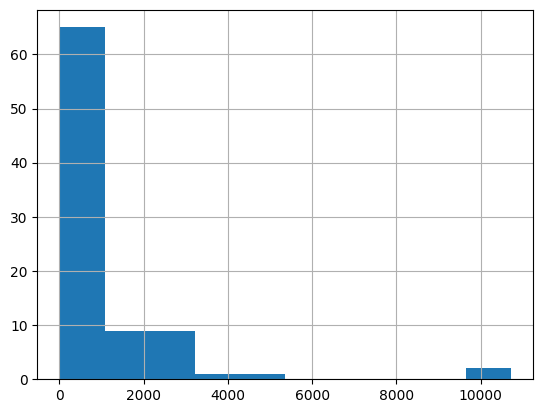

In [25]:
long_df["word_len"].hist()

array([[<Axes: title={'center': 'abstract'}>,
        <Axes: title={'center': 'introduction'}>],
       [<Axes: title={'center': 'result'}>, <Axes: >]], dtype=object)

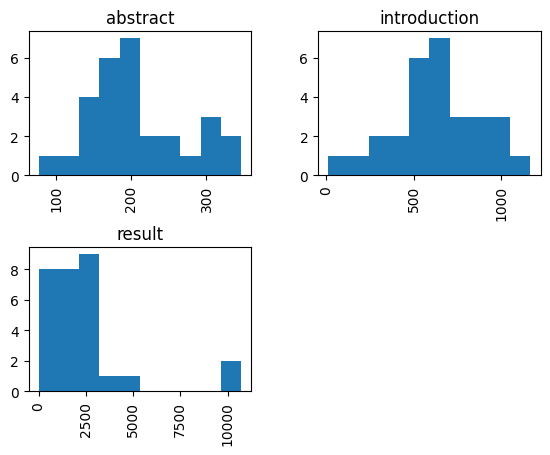

In [ ]:
types = ["abstract", "introduction", "result"]

long_df.loc[long_df["type"].isin(types), "word_len"].hist(by=long_df.loc[long_df["type"].isin(types), "type"])

*Возможно, на среднюю длину результатов повлиял выброса, наблюдаемый на гистограме, можно проверить, например, с помощью правила трех сигм (после проверки на нормальность) и подтверить, что это выброс, но как будто в данной задаче это не имеет смысла. Можно построить боксплот и там посмотреть.*

<Axes: title={'center': 'word_len'}, xlabel='type'>

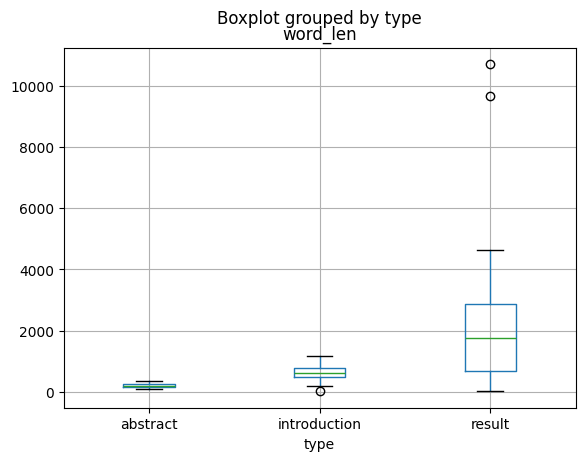

In [28]:
long_df[long_df["type"].isin(types)].boxplot(column="word_len", by="type")

*Выбросы действительно присутствуют. В целом все выглядит логичным: абстракты короткие, введения среднего объема, результаты длиннее.*

*Для проверки качества текстов можно посмотреть на частотность би- и три-грамм. Чем больше будет специфичных терминов, тем по идее более качественными являются тексты.*

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
vec = CountVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(2, 4),
    min_df=2,
    max_df=0.9
)

In [57]:
X = vec.fit_transform(long_df["text"].astype("string"))
ngrams = vec.get_feature_names_out()
freq = X.sum(axis=0).A1

In [58]:
freq_df = pd.DataFrame({"ngram": ngrams, "count": freq}).sort_values("count", ascending=False)
freq_df.head(20)

,ngram,count
1952,et al,291
561,alzheimer disease,82
388,ad patients,80
4911,supporting information,71
360,ad mice,67
5214,tr zra,55
709,app ps1,53
5074,tau hyperphosphorylation,51
562,alzheimer disease ad,51
1675,disease ad,51


*Можно исключить из текстов "et al", "supporting information", "shown figure", так как они не имеют полезной для текущей задачи смысловой нагрузки.*

## Задание 4
- Подготовить данные для моделирования

In [62]:
gurb_phrases = ["et al", "supporting information", "shown figure"]

for phrase in gurb_phrases:
    long_df["text"] = long_df["text"].astype("string").str.replace(phrase, "", regex=False)

In [63]:
long_df.head(3)

,title,year,link,type,text,word_len
0,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,abstract,Amyloid β -protein (A β ) is reported to activ...,316
1,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,introduction,Alzheimer’s disease (AD) is an irreversible ne...,984
2,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,result,Sal Improved A β 1-42 and D-gal/AlCl 3 Induced...,2858


In [ ]:
file_names = articles_df.reset_index().set_index("title")["index"]
long_df["file"] = long_df["title"].map(file_names).astype("Int64").astype("string") + ".pdf"
long_df.head(4)

,title,year,link,type,text,word_len,file
0,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,abstract,Amyloid β -protein (A β ) is reported to activ...,316,0.pdf
1,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,introduction,Alzheimer’s disease (AD) is an irreversible ne...,984,0.pdf
2,Salidroside Ameliorates Alzheimer's Disease by...,2022,https://doi.org/10.3389/fnagi.2021.809433,result,Sal Improved A β 1-42 and D-gal/AlCl 3 Induced...,2858,0.pdf
3,Metabolic reprogramming in inflammatory microg...,2023,https://doi.org/10.1016/j.redox.2023.102846,abstract,Microglia activation drives the pro-inflammato...,253,1.pdf


In [73]:
long_df.to_csv("long_bd_df.csv")

*Разделим тексты на чанки и сделаем векторную базу с langchain.*

In [1]:
import pandas as pd

In [2]:
long_bd_df = pd.read_csv("long_bd_df.csv", index_col=0)

In [3]:
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma

c:\Users\Аскер\Desktop\LLM-based agent (Alzheimer's disease)\db_collecting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
long_bd_df.iloc[9]

title       GSK3: A potential target and pending issues fo...
year                                                     2024
link                        https://doi.org/10.1111/cns.14818
type                                                 abstract
text        Glycogen synthase kinase- 3 (GSK3), consisting...
word_len                                                  166
file                                                    3.pdf
Name: 9, dtype: object

In [5]:
corpus_docs = [
    Document(page_content=row["text"], metadata={"id": idx, "title": row["title"], "year": row["year"], "link": row["link"], "type": row["type"], "file": row["file"]})
    for idx, row in long_bd_df.iterrows()
]

len(corpus_docs)

87

In [6]:
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
docs = splitter.split_documents(corpus_docs)
len(docs)

2503

In [7]:
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

In [10]:
vectordb = Chroma.from_documents(documents=docs, embedding=embedding_model, persist_directory="chroma_artilcles")

In [13]:
vectordb.similarity_search(query="What are potential targets for Alzheimer's disease treatment?", k=3)

[Document(id='fe09d990-e93f-4076-ba0e-ebb3f5cd7cf8', metadata={'title': 'A hybrid approach unveils drug repurposing candidates targeting an Alzheimer pathophysiology mechanism', 'type': 'introduction', 'year': 2022, 'file': '26.pdf', 'link': 'https://doi.org/10.1016/j.patter.2021.100433', 'id': 73}, page_content='remedies that are currently approved and used for symptomatic treatment of AD.2 THE BIGGER PICTURE Owing to current setbacks in the discovery and development of novel treatments tackling Alzheimer disease (AD), a re-evaluation of research and development (R&D) strategies is underway. Here, we'),
 Document(id='c6a6bd64-bc4f-4df3-a61d-dc1d90e4e16b', metadata={'link': 'https://doi.org/10.1016/j.patter.2021.100433', 'title': 'A hybrid approach unveils drug repurposing candidates targeting an Alzheimer pathophysiology mechanism', 'file': '26.pdf', 'year': 2022, 'id': 73, 'type': 'introduction'}, page_content='remedies that are currently approved and used for symptomatic treatment o

*Чанки выглядят расплывчатыми и подходят для описания AD в общих словах. Возможно, ограничение поиска только текстами из результатов и увеличение количества релевантных k немного улучшит ситуацию. ​Можно было бы подумать лучше над предобработкой. Например, не брать введения и абстракты, но в таком случае модель БЯМ не будет получать из базы поверхностную информацию, нужную для ответа на более общие вопросы.*

In [14]:
vectordb.similarity_search(query="What are potential targets for Alzheimer's disease treatment?", k=3, filter={"type": "result"})

[Document(id='46bcc8ca-edd5-44d9-bb6e-df800e77f477', metadata={'type': 'result', 'id': 8, 'year': 2024, 'title': "Natural acetylcholinesterase inhibitors: A multi-targeted therapeutic potential in Alzheimer's disease", 'link': 'https://doi.org/10.1016/j.ejmcr.2024.100154', 'file': '2.pdf'}, page_content='remedies on AD, and evaluates their potential as alternative treatments for the disease. Currently, the most commonly drugs used to treat Alzheimer’s disease are acetylcholinesterase/cholinesterase inhibitors (ChE-Is). The first ChE-I to be approved for the symptomatic therapy of AD was tacrine,'),
 Document(id='466b2524-4bb6-4ebe-b955-362f3c8eeee3', metadata={'title': "Natural acetylcholinesterase inhibitors: A multi-targeted therapeutic potential in Alzheimer's disease", 'year': 2024, 'id': 8, 'type': 'result', 'link': 'https://doi.org/10.1016/j.ejmcr.2024.100154', 'file': '2.pdf'}, page_content='remedies on AD, and evaluates their potential as alternative treatments for the disease.

*Фильтр ограничивает выборку чанками из результатов, поэтому ответы становятся более подходящими. Видимо, в результатах приводятся названия конкретных сущностей в отличие от введений. Однако тут все три чанка из одной статьи, вероятно, надо увеличить размер чанков.*

In [8]:
splitter = RecursiveCharacterTextSplitter(chunk_size=450, chunk_overlap=50)
docs = splitter.split_documents(corpus_docs)

vectordb = Chroma.from_documents(documents=docs, embedding=embedding_model, persist_directory="chroma_artilcles")

*Правильная настройка retriever позволит улучшить релевантность выборки в целом. После проведения небольшого эксперимента с разными значениями lambda_mult, fetch_k и k, которые позволяют регулировать различия и релевантность в выдаваемых документах, количество всей выборки, из которой выбираются итоговые и количество итоговых, были выбраны следующие. Из всех документов берется 35 наиболее релевантных, из них отбирается 5, чьи эмбеддинги достаточно далеки друг от друга. Это позволяет взять документы с разными смыслами, из-за чего нужные нам сущноти точно попадут в БЯМ.*

In [9]:
retriever = vectordb.as_retriever(
    search_type="mmr",
    search_kwargs={"k": 5, "fetch_k": 35, "lambda_mult": 0.3},
)

In [10]:
retriever.invoke("What are potential targets for Alzheimer's disease treatment?")

[Document(id='f9ad16ee-92ac-4237-934c-e37707a7081f', metadata={'file': '8.pdf', 'link': 'https://doi.org/10.1002/alz.14313', 'id': 25, 'type': 'introduction', 'year': 2024, 'title': "Associations of semaglutide with first‐time diagnosis of Alzheimer's disease in patients with type 2 diabetes: Target trial emulation using nationwide real‐world data in the US"}, page_content='An estimated 6.9 million Americans aged 65 and older will be living with Alzheimer’s disease (AD) in 2024, a number that is projected to increase to 13.8 million by 2060.1 AD has no cure, and about 40% of cases are linked to modifiable risk factors.2 Given its growing prevalence, profound societal and economic impact, and absence of a cure, targeting these modifiable risk factors is crucial to prevent or delay AD and related dementia. 3,4'),
 Document(id='96986312-5a98-4615-99d1-599c522885b6', metadata={'type': 'result', 'id': 35, 'title': "Targeting transthyretin in Alzheimer's disease: Drug discovery of small-mole

Случайные документы, по которым можно сгенерировать вопросы для проверки качества разрабатываемой системы:

In [14]:
import random
random_docs = random.sample(docs, 15)

In [15]:
random_docs

[Document(metadata={'id': 79, 'title': 'Genomics and Drug Research Approach in Identifying Potential Drug Target Highlighting Alzheimer Disease', 'year': 2024, 'link': 'https://doi.org/10.52403/gijhsr.20240115', 'type': 'introduction', 'file': '29.pdf'}, page_content='extracted from plants which act as potent herbal medicine and helps to form a complex which can be used as drug for the treatment of AD. Further, docking studies were carried out in which BACE1 is best docked with chromen-4-one followed by some other bioactive compounds with positive potential result. To cross validate our docking research hypothesis we conducted computational based molecular dynamic (MD) simulation analysis to find potential'),
 Document(metadata={'id': 50, 'title': "Study on the Role of an Erythrocyte Membrane‐Coated Nanotheranostic System in Targeted Immune Regulation of Alzheimer's Disease", 'year': 2023, 'link': 'https://doi.org/10.1002/advs.202301361', 'type': 'result', 'file': '17.pdf'}, page_conte